In [245]:
# Import libraries
import pandas as pd
import numpy as np

from datetime import datetime

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt
%matplotlib inline


from datetime import datetime

from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA as ARIMA
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm



pd.options.display.float_format = '{:.2f}'.format


In [246]:
# Load the dataset
df = pd.read_csv(r'C:\Users\amitn\Downloads\1057_1913_bundle_archive\AirPassengers.csv')

In [247]:
# Rename the #Passengers column to Passenger for ease at work 
df = df.rename(columns = {'#Passengers':'Passengers'})

In [248]:
# Change the Month column to Date time format
df['Date'] = (pd.to_datetime(df['Month']))
df = df.drop(columns = 'Month')
df = df.set_index('Date')
df

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


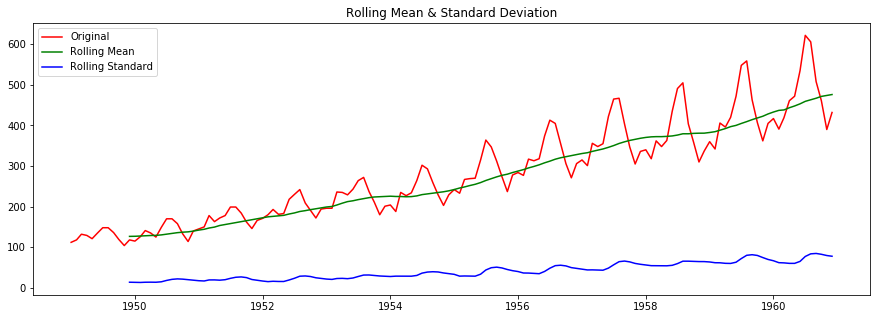

p-value                         0.82
#Lags Used                      0.99
Test Statistic                 13.00
Number of Observations Used   130.00
dtype: float64


In [249]:
# firstly we will check wether the data is stationary or not.

# Determine rolling statistics
# we'll see wether the rolling mean and rolling standard deviation increases with time or not and if True then it's not stationary.
m_a = df['Passengers'].rolling(window=12).mean()
m_std = df['Passengers'].rolling(window=12).std()

# we'll try to visualize it by Plotting the rolling statistics:
plt.figure(figsize=(15,5))
plt.plot(df['Passengers'], color='Red',label='Original')
plt.plot(m_a, color='green', label='Rolling Mean')
plt.plot(m_std, color='blue', label = 'Rolling Standard')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Let's perform Dickey-Fuller test:
dftest = adfuller(df['Passengers'])
dfoutput = pd.Series(dftest[0:4], index=['p-value','#Lags Used','Test Statistic','Number of Observations Used'])
# for key,value in dftest[4].items():
#      dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [250]:
# So here we can conclude from the above Plot that the data is not stationary
# The P-value is higher then 0.05 & the Trend is also boosting up.
# The data is seasonal

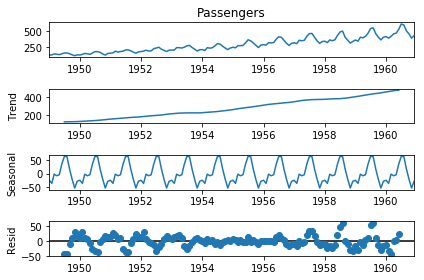

In [251]:
# analyse the structure of data using Seasonal decompose by statsmodels lib
dec = sm.tsa.seasonal_decompose(df['Passengers'],period = 12).plot()
plt.show()

In [252]:
# taking the log of the dependent variable will help us in reducing the rate to which the rolling mean increses
log_data = np.log(df)
log_data.head()

,Passengers
Date,
1949-01-01,4.72
1949-02-01,4.77
1949-03-01,4.88
1949-04-01,4.86
1949-05-01,4.80


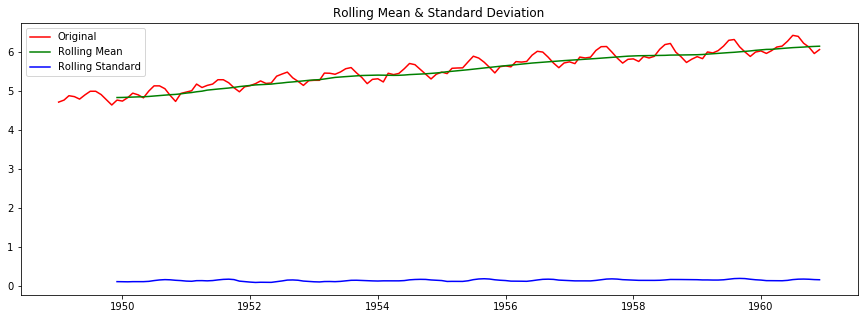

p-value                        -1.72
#Lags Used                      0.42
Test Statistic                 13.00
Number of Observations Used   130.00
dtype: float64


In [253]:
# Passing the data through the test again
m_a = log_data['Passengers'].rolling(window=12).mean()
m_std = log_data['Passengers'].rolling(window=12).std()

plt.figure(figsize=(15,5))
plt.plot(log_data['Passengers'], color='Red',label='Original')
plt.plot(m_a, color='green', label='Rolling Mean')
plt.plot(m_std, color='blue', label = 'Rolling Standard')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

dftest = adfuller(log_data['Passengers'])
dfoutput = pd.Series(dftest[0:4], index=['p-value','#Lags Used','Test Statistic','Number of Observations Used'])

print(dfoutput)

In [254]:
# you can see there is a slight improvement in it's distribution as compared to the previous one


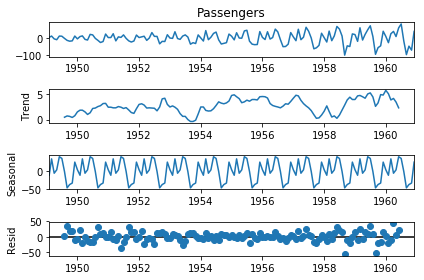

In [255]:
# Perform the differencing. It's one of the technique to transform the data into stationary.
d_diff = df['Passengers'].diff()
d_diff = d_diff.dropna()
dec = sm.tsa.seasonal_decompose(d_diff,period = 12).plot()
plt.show()

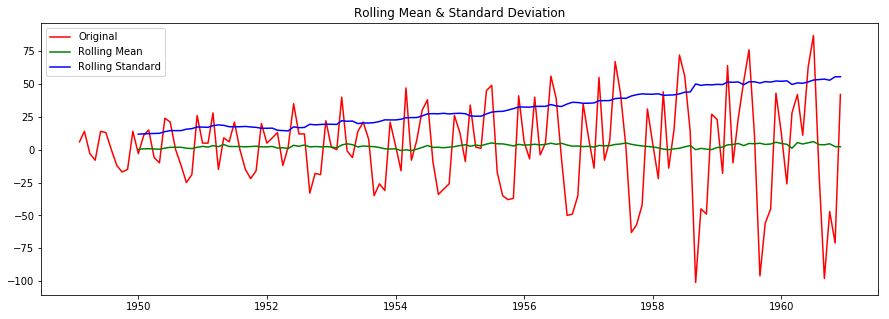

p-value                        -2.83
#Lags Used                      0.05
Test Statistic                 12.00
Number of Observations Used   130.00
dtype: float64


In [256]:
# Checking and plotting the outputs again
m_a = d_diff.rolling(window=12).mean()
m_std = d_diff.rolling(window=12).std()

plt.figure(figsize=(15,5))
plt.plot(d_diff, color='Red',label='Original')
plt.plot(m_a, color='green', label='Rolling Mean')
plt.plot(m_std, color='blue', label = 'Rolling Standard')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

test = adfuller(d_diff)
output = pd.Series(test[0:4], index=['p-value','#Lags Used','Test Statistic','Number of Observations Used'])

print(output)

In [257]:
# Results displays our p-value has reduced to 0.05, we have brought the rolling and trend path to constant. But even after making the data stationary the data is seasonal as you can see in the plot. 

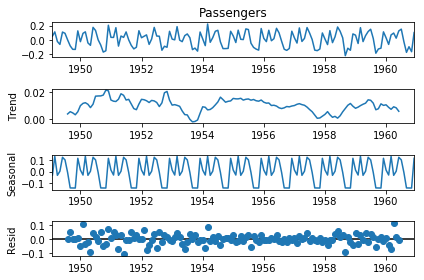

In [258]:
# Again performing the data differencing to make improvements in it.
l_d_diff = log_data['Passengers'].diff()
l_d_diff = l_d_diff.dropna()
dec = sm.tsa.seasonal_decompose(l_d_diff,period = 12)
dec.plot()
plt.show()

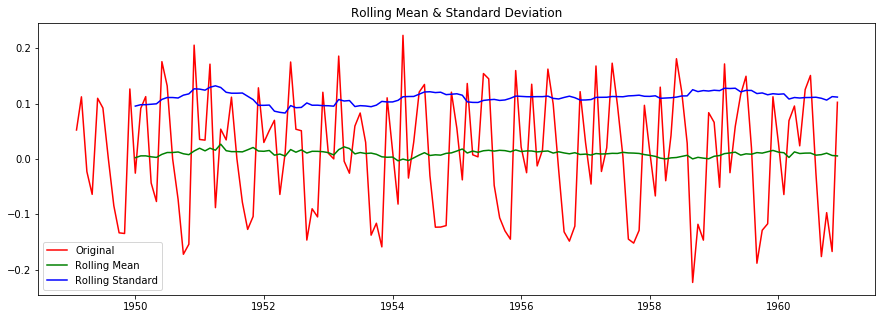

p-value                        -2.72
#Lags Used                      0.07
Test Statistic                 14.00
Number of Observations Used   128.00
dtype: float64


In [259]:
# Again testing the data

m_a = l_d_diff.rolling(window=12).mean()
m_std = l_d_diff.rolling(window=12).std()

plt.figure(figsize=(15,5))
plt.plot(l_d_diff, color='Red',label='Original')
plt.plot(m_a, color='green', label='Rolling Mean')
plt.plot(m_std, color='blue', label = 'Rolling Standard')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

test = adfuller(l_d_diff)
output = pd.Series(test[0:4], index=['p-value','#Lags Used','Test Statistic','Number of Observations Used'])

print(output)

In [260]:
# There is a little bit improvement in the Data as we can see in the Plot. The problem of seasonality still exist.

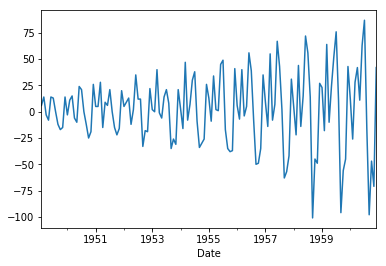

In [261]:

d_diff.plot()

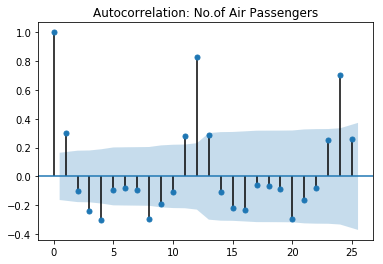

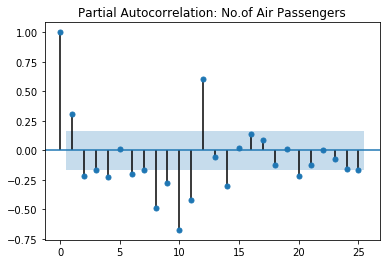

In [262]:
from statsmodels.graphics.tsaplots import plot_acf

lags=25
plot_acf(d_diff,title='Autocorrelation: No.of Air Passengers',lags=lags);
plot_pacf(d_diff,title='Partial Autocorrelation: No.of Air Passengers',lags=lags);
plt.show()

In [263]:
# From the above plots we can decide the value p = 2 , d = 1 & q as 2. This three values are taken by the Arima model.
# P stands for the Autoregressive order, D stands for differencing Orders and the Q is for Moving Average order.

In [264]:
# Calling the  ARIMA model with p =2, q=2 and d=1.
model = ARIMA(df['Passengers'],order = (2,1,2))
model_fit = model.fit()
print(model_fit.summary())

c:\intelpython3\intelpython3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\intelpython3\intelpython3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.710
Date:                Fri, 10 Jul 2020   AIC                           1344.043
Time:                        16:10:40   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5310      0.708      3.574      0.000       1.143       3.919
ar.L1.D.Passengers     1.6477      0.033     49.934      0.000       1.583       1.712
ar.L2.D.Passengers  

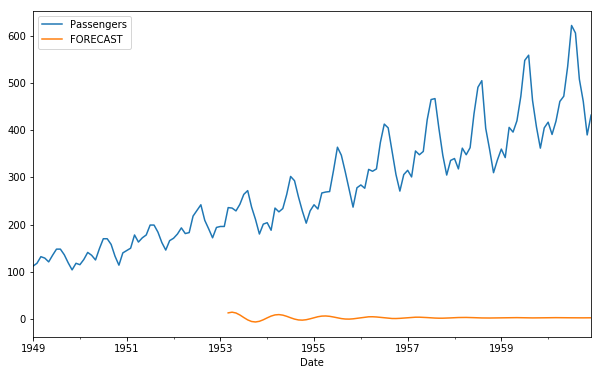

In [265]:
# prediction
df['FORECAST'] = model_fit.predict(start = 50,end = 144,dynamic = True)
df[['Passengers','FORECAST']].plot(figsize = (10,6))

In [266]:
# After ploting the predictions the Forecast looks something like this

In [267]:
# Calculating the MAE
pred = [df.iloc[i,1] for i in range(120,len(df))]
exp = [df.iloc[i,0] for i in range(120,len(df))]
df = df.drop(columns = 'FORECAST')

print(mean_absolute_error(exp,pred))

449.6944543344985


In [268]:
# Now as we can see from the plot the data appears to be improper and the MAE is also too far. This is due to the issue of seasonality which can't be handled by the ARIMA model.
# To overcome this problemwe use the SARIMAX Model which is specially designed to work over the seasonal data. So lets give a try..

In [269]:
# SARIMAX

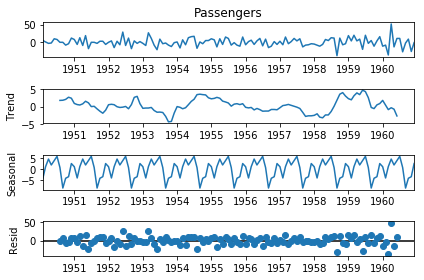

In [270]:
#differencing
dds = d_diff.diff(12)
dds = dds.dropna()
dec = sm.tsa.seasonal_decompose(dds,period = 12)
dec.plot()
plt.show()

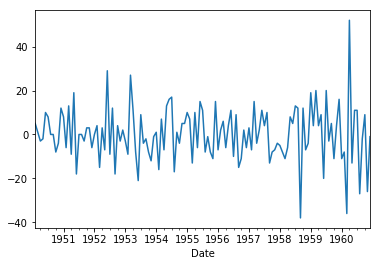

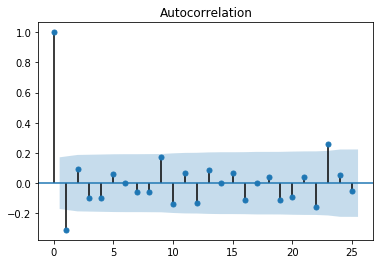

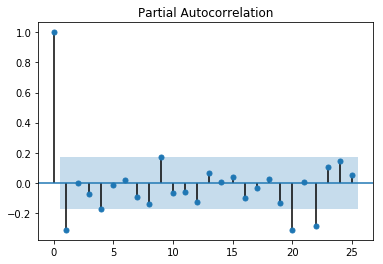

In [271]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Identification of an AR model is done with the PACF and MA model is done with the ACF.
dds.plot()
plot_acf(dds,title='Autocorrelation',lags=lags);
plot_pacf(dds,title='Partial Autocorrelation',lags=25);


In [272]:
# So After differencing we get the following results. Now we'll try to work with the sarimax model. There is an addition to parameters with "s". It is defined as number of time steps for a single seasonal period. 
model = sm.tsa.statespace.SARIMAX(df['Passengers'],order = (2,1,2),seasonal_order = (2,1,2,12))
results = model.fit()
print(results.summary())

c:\intelpython3\intelpython3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\intelpython3\intelpython3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\intelpython3\intelpython3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -498.171
Date:                            Fri, 10 Jul 2020   AIC                           1014.341
Time:                                    16:10:50   BIC                           1040.218
Sample:                                01-01-1949   HQIC                          1024.856
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6299      0.429      1.467      0.142      -0.212       1.471
ar.L2          0.1995      0.344   

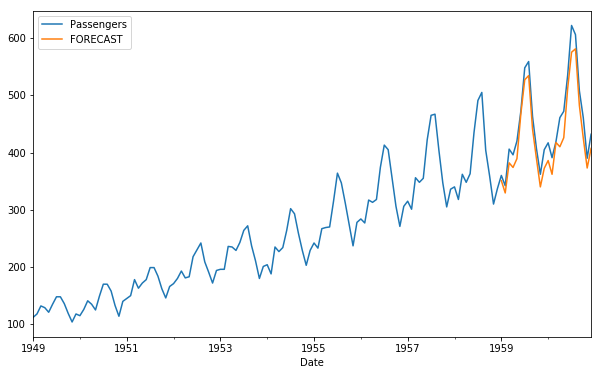

In [273]:
df['FORECAST'] = results.predict(start = 120,end = 150,dynamic = True)
df[['Passengers','FORECAST']].plot(figsize = (10,6))

In [274]:
# So, Finally the SARIMAX has worked great, as you can see the visualization.. the forecast is lot better and is pretty similar to the original data. Let's see the Error.

In [275]:
exp = [df.iloc[i,0] for i in range(120,len(df))]
pred = [df.iloc[i,1] for i in range(120,len(df))]
df = df.drop(columns = 'FORECAST')
print(mean_absolute_error(exp,pred))

24.962135699000644


In [276]:
# The error has also recovered a lot.

In [277]:
#** forecasting**

In [278]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x)for x in range(0,28)]
data = pd.DataFrame(index = future_dates[1:],columns = df.columns)

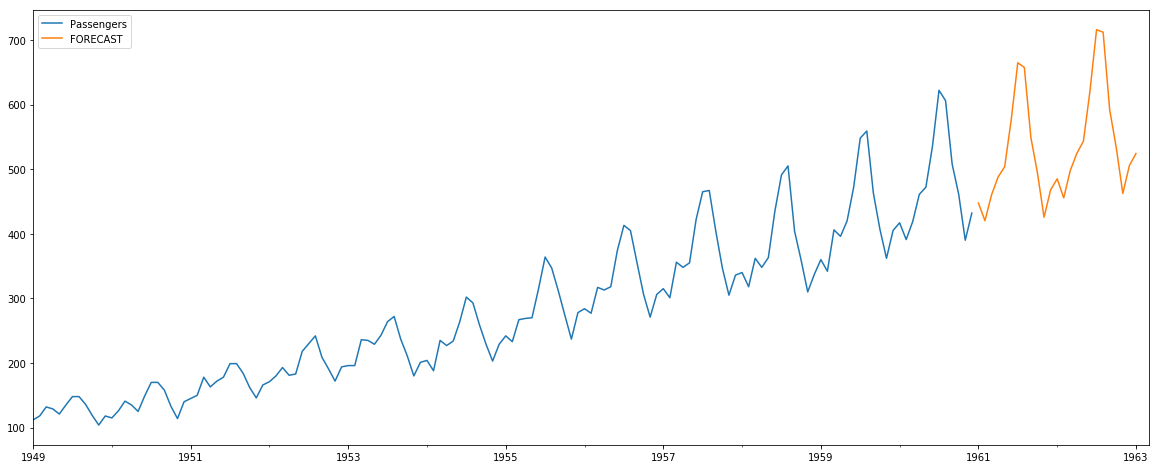

In [279]:
forecast = pd.concat([df,data])
forecast['FORECAST'] = results.predict(start = 144,end = 168,dynamic = True)
forecast[['Passengers','FORECAST']].plot(figsize = (20,8))

In [280]:
# So, you can see the forecasted data. The model has worked well